In [37]:
%matplotlib inline

In [68]:
%matplotlib notebook
import scipy.stats as stats
from scipy.stats import spearmanr
from cryptocmd import CmcScraper
import pandas as pd
import time
import seaborn as sb
import matplotlib.pyplot as plt
import datetime
import numpy as np
from datetime import datetime, timedelta

import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import preprocessing

C:\Users\wuhua\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [69]:
# Take in all of our story count data and read it into pandas
Bitcoin_Cash = "crypto_news_data/Bitcoin_Cash.csv"
Bitcoin = "crypto_news_data/Bitcoin.csv"
Crypto = "crypto_news_data/Crypto.csv"
EOS = "crypto_news_data/EOS.csv"
ETH = "crypto_news_data/ETH.csv"
Ripple = "crypto_news_data/Ripple.csv"

Bitcoin_Cash_df = pd.read_csv(Bitcoin_Cash)
Bitcoin_df = pd.read_csv(Bitcoin)
Crypto_df = pd.read_csv(Crypto)
EOS_df = pd.read_csv(EOS)
ETH_df = pd.read_csv(ETH)
Ripple_df = pd.read_csv(Ripple)

# Rename columns
Bitcoin_Cash_df = Bitcoin_Cash_df.rename(columns={'Search: TOPIC:BITCOIN Story Count':'News_Count'})
Bitcoin_df = Bitcoin_df.rename(columns={'Search: TOPIC:BITCOIN Story Count':'News_Count'})
Crypto_df = Crypto_df.rename(columns={'Search: CRYPTO Story Count':'News_Count'})
EOS_df = EOS_df.rename(columns={'Search: EOS Story Count':'News_Count'})
ETH_df = ETH_df.rename(columns={'Search: ETH Story Count':'News_Count'})
Ripple_df = Ripple_df.rename(columns={'Search: RIPPLE Story Count':'News_Count'})

# Format Date column
Bitcoin_Cash_df['Date'] = pd.to_datetime(Bitcoin_Cash_df['Date'])
Bitcoin_df['Date'] = pd.to_datetime(Bitcoin_df['Date'])
Crypto_df['Date'] = pd.to_datetime(Crypto_df['Date'])
EOS_df['Date'] = pd.to_datetime(EOS_df['Date'])
ETH_df['Date'] = pd.to_datetime(ETH_df['Date'])
Ripple_df['Date'] = pd.to_datetime(Ripple_df['Date'])

In [70]:
# scraping stock data of crypto currency
scraper_bitcoin = CmcScraper("btc")
scraper_eth = CmcScraper("eth")
scraper_xrp = CmcScraper("xrp")
scraper_eos = CmcScraper("eos")
scraper_bch = CmcScraper("bch")
scraper_xlm = CmcScraper("xlm")
scraper_ltc = CmcScraper("ltc")
scraper_ada = CmcScraper("ada")
scraper_xmr = CmcScraper("xmr")
scraper_trx = CmcScraper("trx")

In [71]:
# converting to csv
#scraper_bitcoin.export_csv("crypto_stock_data/btc_all_time.csv")
#scraper_eth.export_csv("crypto_stock_data/eth_all_time.csv")
#scraper_xrp.export_csv("crypto_stock_data/xrp_all_time.csv")
#scraper_eos.export_csv("crypto_stock_data/eos_all_time.csv")
#scraper_bch.export_csv("crypto_stock_data/bch_all_time.csv")
#scraper_xlm.export_csv("crypto_stock_data/xlm_all_time.csv")
#scraper_ltc.export_csv("crypto_stock_data/ltc_all_time.csv")
#scraper_ada.export_csv("crypto_stock_data/ada_all_time.csv")
#scraper_xmr.export_csv("crypto_stock_data/xmr_all_time.csv")
#scraper_trx.export_csv("crypto_stock_data/trx_all_time.csv")

# place into dataframe
#df_bitcoin = pd.read_csv("crypto_stock_data/btc_all_time.csv")
#df_etherum = pd.read_csv("crypto_stock_data/eth_all_time.csv")
#df_xrp = pd.read_csv("crypto_stock_data/xrp_all_time.csv")
#df_eos = pd.read_csv("crypto_stock_data/eos_all_time.csv")
#df_bch = pd.read_csv("crypto_stock_data/bch_all_time.csv")
#df_xlm = pd.read_csv("crypto_stock_data/xlm_all_time.csv")
#df_ltc = pd.read_csv("crypto_stock_data/ltc_all_time.csv")
#df_ada = pd.read_csv("crypto_stock_data/ada_all_time.csv")
#df_xmr = pd.read_csv("crypto_stock_data/xmr_all_time.csv")
#df_trx = pd.read_csv("crypto_stock_data/trx_all_time.csv")

# Place into dataframe
df_bitcoin = scraper_bitcoin.get_dataframe()
df_etherum = scraper_eth.get_dataframe()
df_xrp = scraper_xrp.get_dataframe()
df_eos = scraper_eos.get_dataframe()
df_bch = scraper_bch.get_dataframe()
df_xlm = scraper_xlm.get_dataframe()
df_ltc = scraper_ltc.get_dataframe()
df_ada = scraper_ada.get_dataframe()
df_xmr = scraper_xmr.get_dataframe()
df_trx = scraper_trx.get_dataframe()

# format Date column
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])
df_etherum['Date'] = pd.to_datetime(df_etherum['Date'])
df_xrp['Date'] = pd.to_datetime(df_xrp['Date'])
df_eos['Date'] = pd.to_datetime(df_eos['Date'])
df_bch['Date'] = pd.to_datetime(df_bch['Date'])
df_xlm['Date'] = pd.to_datetime(df_xlm['Date'])
df_ltc['Date'] = pd.to_datetime(df_ltc['Date'])
df_ada['Date'] = pd.to_datetime(df_ada['Date'])
df_xmr['Date'] = pd.to_datetime(df_xmr['Date'])
df_trx['Date'] = pd.to_datetime(df_trx['Date'])


In [105]:
# Merge Story and Stock data of Bitcoin, Bitcoin_Cash, EOS, ETH, Ripple
Bitcoin = pd.merge(Bitcoin_df, df_bitcoin, on='Date')
BCH = pd.merge(Bitcoin_Cash_df, df_bch, on='Date')
EOS = pd.merge(EOS_df, df_eos, on='Date')
ETH = pd.merge(ETH_df, df_etherum, on='Date')
Ripple = pd.merge(Ripple_df, df_xrp, on='Date')

print(Bitcoin.head())
print(BCH.head())
print(EOS.head())
print(ETH.head())
print(Ripple.head())

        Date  News_Count     Open     High      Low    Close      Volume  \
0 2018-11-01          21  6318.14  6547.14  6311.83  6377.78  3789400000   
1 2018-10-31          15  6336.99  6349.16  6316.88  6317.61  4191240000   
2 2018-10-30          15  6337.04  6364.99  6310.14  6334.27  3781100000   
3 2018-10-29          15  6492.35  6503.60  6306.99  6332.63  4199910000   
4 2018-10-26           9  6468.44  6498.29  6449.61  6474.75  3306050000   

     Market Cap  
0  110683820788  
1  109627117226  
2  109903543419  
3  109862898081  
4  112294341019  
        Date  News_Count    Open    High     Low   Close     Volume  \
0 2018-11-01          21  423.07  432.58  421.83  424.09  228640000   
1 2018-10-31          15  422.23  424.62  411.52  422.86  286666000   
2 2018-10-30          15  417.69  422.97  415.21  421.93  243462000   
3 2018-10-29          15  440.21  440.90  414.61  417.57  294419000   
4 2018-10-26           9  439.12  441.53  436.15  438.74  259970000   

   Marke

In [106]:
Bitcoin.head()

,Date,News_Count,Open,High,Low,Close,Volume,Market Cap
0,2018-11-01,21,6318.14,6547.14,6311.83,6377.78,3789400000,110683820788
1,2018-10-31,15,6336.99,6349.16,6316.88,6317.61,4191240000,109627117226
2,2018-10-30,15,6337.04,6364.99,6310.14,6334.27,3781100000,109903543419
3,2018-10-29,15,6492.35,6503.60,6306.99,6332.63,4199910000,109862898081
4,2018-10-26,9,6468.44,6498.29,6449.61,6474.75,3306050000,112294341019


In [107]:
Bitcoin_graph = Bitcoin.loc[:, [ "Date","News_Count","Close"]]
Bitcoin_graph.head()

,Date,News_Count,Close
0,2018-11-01,21,6377.78
1,2018-10-31,15,6317.61
2,2018-10-30,15,6334.27
3,2018-10-29,15,6332.63
4,2018-10-26,9,6474.75


<IPython.core.display.Javascript object>


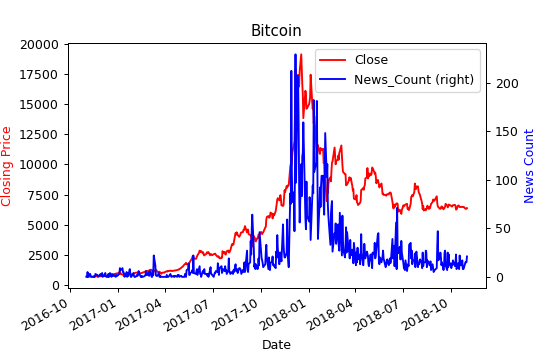

In [110]:
ax  = Bitcoin_graph.plot(x="Date",y="Close",color="r")
ax2 = Bitcoin_graph.plot(x="Date",y="News_Count", color="b", ax=ax, secondary_y=True)
plt.title("Bitcoin")
ax.set_ylabel("Closing Price", color="r")
ax2.set_ylabel("News Count", color="b")
plt.savefig("graphs/Line _Charts_Corr/Bitcoin.png")
plt.show()

In [111]:
Bitcoin_graph.corr()

,News_Count,Close
News_Count,1.000000,0.740657
Close,0.740657,1.000000


In [112]:
BCH_graph = BCH.loc[:, [ "Date","News_Count","Close"]]
BCH_graph.head()

,Date,News_Count,Close
0,2018-11-01,21,424.09
1,2018-10-31,15,422.86
2,2018-10-30,15,421.93
3,2018-10-29,15,417.57
4,2018-10-26,9,438.74


<IPython.core.display.Javascript object>


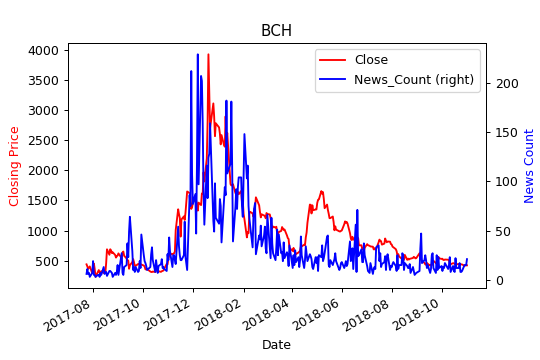

In [113]:
ax  = BCH_graph.plot(x="Date",y="Close",color="r")
ax2 = BCH_graph.plot(x="Date",y="News_Count", color="b", ax=ax, secondary_y=True)
plt.title("BCH")
ax.set_ylabel("Closing Price", color="r")
ax2.set_ylabel("News Count", color="b")
plt.savefig("graphs/Line _Charts_Corr/BCH.png")
plt.show()

In [133]:
BCH_graph.corr()

,News_Count,Close
News_Count,1.000000,0.629239
Close,0.629239,1.000000


In [115]:
EOS_graph = EOS.loc[:, [ "Date","News_Count","Close"]]
EOS_graph.head()

,Date,News_Count,Close
0,2018-11-01,1,5.28
1,2018-10-31,1,5.20
2,2018-10-30,1,5.14
3,2018-10-29,1,5.15
4,2018-10-26,2,5.39


<IPython.core.display.Javascript object>


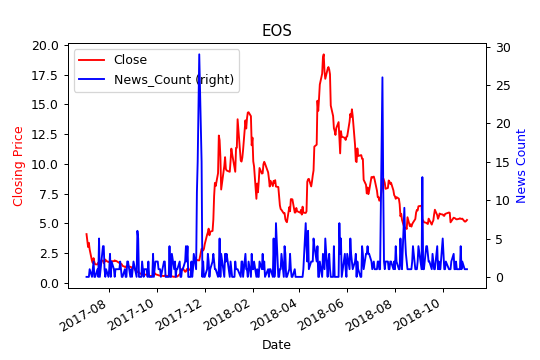

In [116]:
ax  = EOS_graph.plot(x="Date",y="Close",color="r")
ax2 = EOS_graph.plot(x="Date",y="News_Count", color="b", ax=ax, secondary_y=True)
plt.title("EOS")
ax.set_ylabel("Closing Price", color="r")
ax2.set_ylabel("News Count", color="b")
plt.savefig("graphs/Line _Charts_Corr/EOS.png")
plt.show()

In [117]:
EOS_graph.corr()

,News_Count,Close
News_Count,1.000000,0.009855
Close,0.009855,1.000000


In [118]:
ETH_graph = ETH.loc[:, [ "Date","News_Count","Close"]]
ETH_graph.head()

,Date,News_Count,Close
0,2018-11-01,6,198.87
1,2018-10-31,3,197.38
2,2018-10-30,6,197.56
3,2018-10-29,4,197.25
4,2018-10-26,4,203.33


<IPython.core.display.Javascript object>


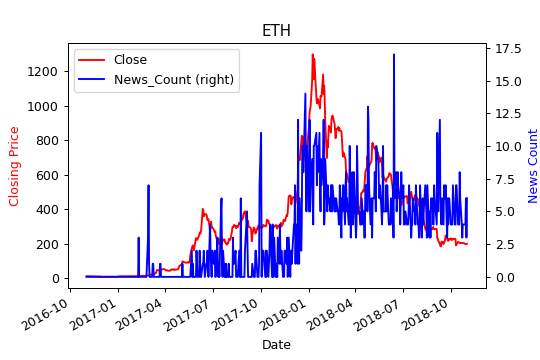

In [119]:
ax  = ETH_graph.plot(x="Date",y="Close",color="r")
ax2 = ETH_graph.plot(x="Date",y="News_Count", color="b", ax=ax, secondary_y=True)
plt.title("ETH")
ax.set_ylabel("Closing Price", color="r")
ax2.set_ylabel("News Count", color="b")
plt.savefig("graphs/Line _Charts_Corr/ETH.png")
plt.show()

In [120]:
ETH_graph.corr()

,News_Count,Close
News_Count,1.000000,0.690201
Close,0.690201,1.000000


In [121]:
Ripple_graph = Ripple.loc[:, [ "Date","News_Count","Close"]]
Ripple_graph.head()

,Date,News_Count,Close
0,2018-11-01,4,0.455722
1,2018-10-31,3,0.448382
2,2018-10-30,4,0.444759
3,2018-10-29,4,0.441514
4,2018-10-28,2,0.462406


<IPython.core.display.Javascript object>


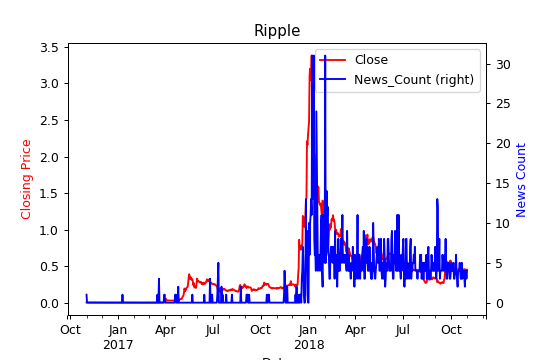

In [58]:
ax  = Ripple_graph.plot(x="Date",y="Close",color="r")
ax2 = Ripple_graph.plot(x="Date",y="News_Count", color="b", ax=ax, secondary_y=True)
plt.title("Ripple")
ax.set_ylabel("Closing Price", color="r")
ax2.set_ylabel("News Count", color="b")
plt.savefig("graphs/Line _Charts_Corr/Ripple.png")
plt.show()

In [59]:
Ripple_graph.corr()

,News_Count,Close
News_Count,1.000000,0.661311
Close,0.661311,1.000000


<IPython.core.display.Javascript object>


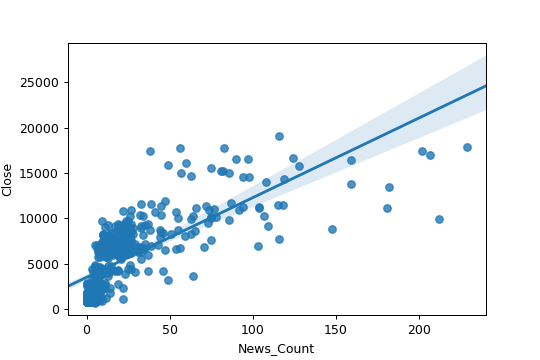

In [122]:
%matplotlib notebook

# Bitcoin Regression
sb.regplot(x='News_Count', y='Close', data=Bitcoin, scatter=True)
plt.savefig('graphs/Regressions/Bitcoin_Regression.png')

In [123]:
# Bitcoin coefficient, p_value

News_Count = Bitcoin['News_Count']
Close = Bitcoin['Close']
spearmanr_coefficient, p_value = spearmanr(News_Count, Close)

spearmanr_coefficient, p_value


(0.8622140903059781, 8.412571634426095e-150)

<IPython.core.display.Javascript object>


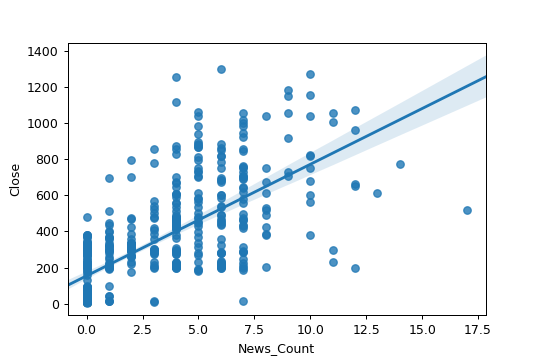

In [124]:
%matplotlib notebook

# Etherum Regression
sb.regplot(x='News_Count', y='Close', data=ETH, scatter=True)

plt.savefig("graphs/Regressions/Etherum_Regression.png")

In [125]:
#Etherum coefficient, p_value
News_Count = ETH['News_Count']
Close = ETH['Close']
spearmanr_coefficient, p_value = spearmanr(News_Count, Close)

spearmanr_coefficient, p_value

(0.7173314380278482, 1.692829172227984e-80)

<IPython.core.display.Javascript object>


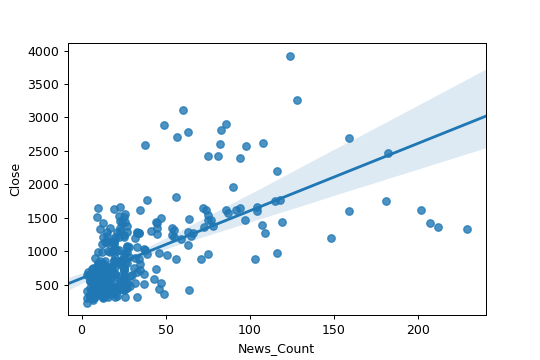

In [126]:
%matplotlib notebook

# Bitcoin Cash Regression
sb.regplot(x='News_Count', y='Close', data=BCH, scatter=True)

plt.savefig("graphs/Regressions/BCH_Regression.png")

In [127]:
#Bitcoin Cash coefficient, p_value
News_Count = BCH['News_Count']
Close = BCH['Close']
spearmanr_coefficient, p_value = spearmanr(News_Count, Close)

spearmanr_coefficient, p_value

(0.6509154124784232, 3.4559302061373053e-40)

<IPython.core.display.Javascript object>


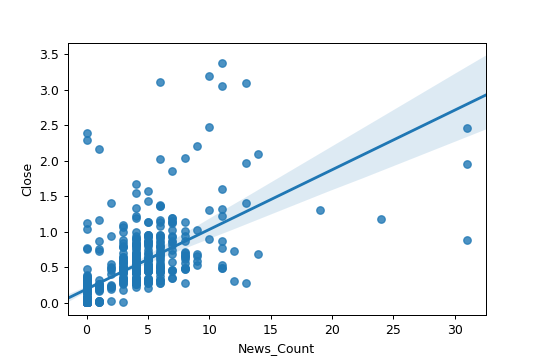

In [128]:
%matplotlib notebook

# Ripple Regression
sb.regplot(x='News_Count', y='Close', data=Ripple, scatter=True)

plt.savefig("graphs/Regressions/Ripple_Regression.png")

In [129]:
# Ripple coefficient, p_value
News_Count = Ripple['News_Count']
Close = Ripple['Close']
spearmanr_coefficient, p_value = spearmanr(News_Count, Close)

spearmanr_coefficient, p_value

(0.7996314285091106, 1.2545960545040068e-163)

<IPython.core.display.Javascript object>


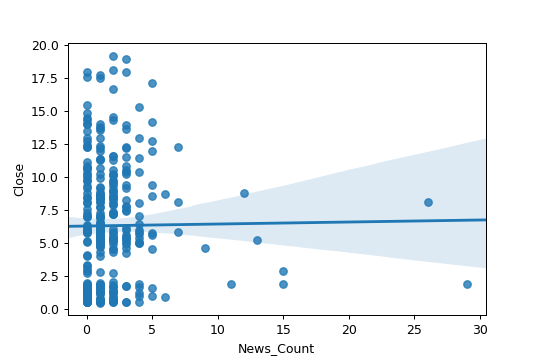

In [130]:
%matplotlib notebook

# EOS Regression
sb.regplot(x='News_Count', y='Close', data=EOS, scatter=True)

plt.savefig("graphs/Regressions/EOS_Regression.png")

In [131]:
# EOS coefficient, p_value
News_Count = EOS['News_Count']
Close = EOS['Close']
spearmanr_coefficient, p_value = spearmanr(News_Count, Close)

spearmanr_coefficient, p_value

(0.10677226735574764, 0.050527899315885166)